**CLUSTERING (UNSUPERVISED LEARNING)**

In [1]:
# import pandas as pd

# url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
# df = pd.read_csv(url)
# df.to_csv('gapminderDataFiveYear.csv', index=False)  # Saves the file in your current directory

In [2]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\JEAN JEASEN\Documents\Codveda\Level_2\gapminderDataFiveYear.csv')
df.head()     

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
df.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [4]:
df.info()
df.isna().sum()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


NameError: name 'features' is not defined

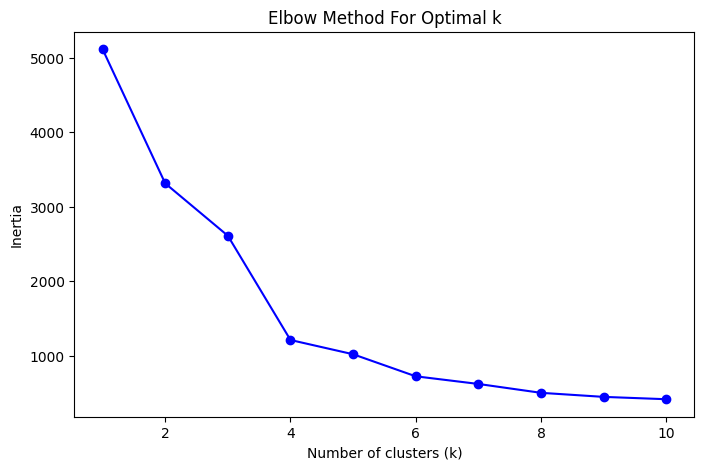

In [ ]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

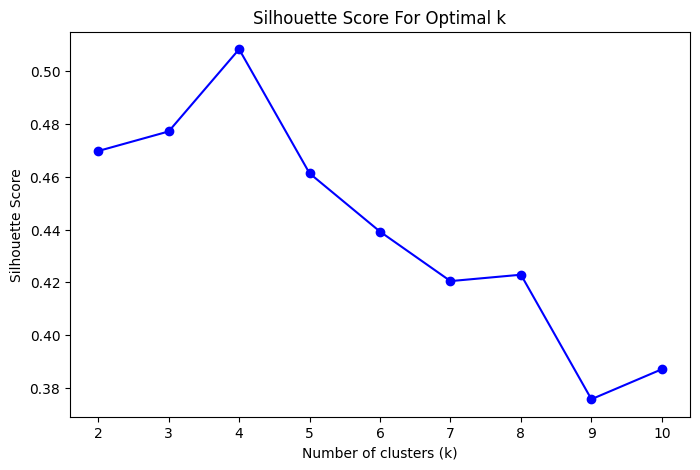

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

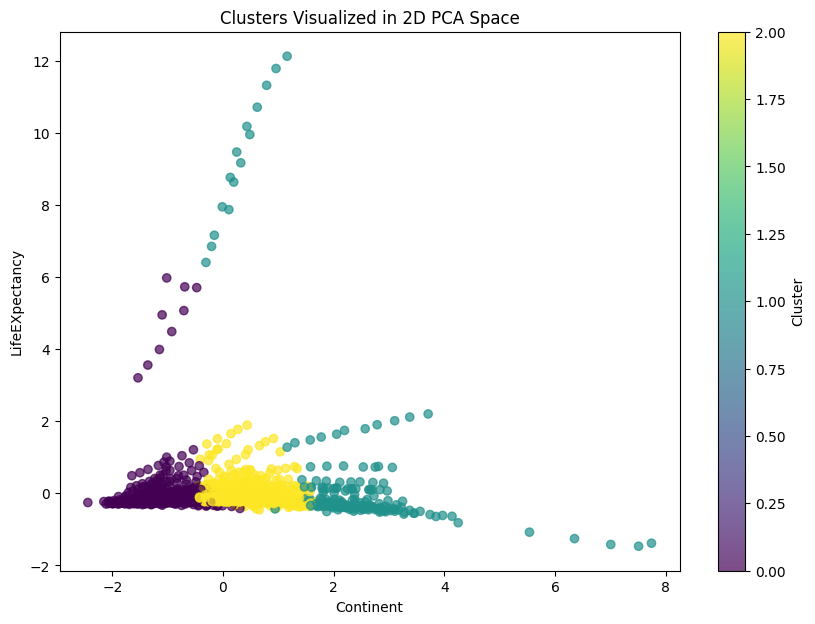

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Continent')
plt.ylabel('LifeEXpectancy')
plt.title('Clusters Visualized in 2D PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
# Filter for a specific year, e.g., 2007, to avoid clustering across time
df_2007 = df[df['year'] == 2007]

# Select relevant numerical columns
features_2007 = df_2007[['gdpPercap', 'lifeExp', 'pop']]

# Standardize the features
X_2007_scaled = scaler.fit_transform(features_2007)

# Apply K-means clustering
kmeans_2007 = KMeans(n_clusters=3, random_state=42)
df_2007['cluster'] = kmeans_2007.fit_predict(X_2007_scaled)

df_2007.head()

C:\Users\JEAN JEASEN\AppData\Local\Temp\ipykernel_19344\1034323138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2007['cluster'] = kmeans_2007.fit_predict(X_2007_scaled)


,country,year,pop,continent,lifeExp,gdpPercap,cluster
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338,0
23,Albania,2007,3600523.0,Europe,76.423,5937.029526,0
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465,0
47,Angola,2007,12420476.0,Africa,42.731,4797.231267,0
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640,0


In [ ]:
# The elbow method is already implemented in cell 6 using the 'inertia' list.
# To determine the optimal number of clusters, we typically look for the "elbow" point in the inertia plot.
# Let's print the inertia values and suggest the possible number of clusters.

for i, val in enumerate(inertia, start=1):
    print(f"Clusters: {i}, Inertia: {val}")

# Based on the plot, the optimal number of clusters is usually where the inertia starts to decrease more slowly.
# You can visually inspect the plot (cell 6) to decide, but typically it's around 3 or 4 clusters for this dataset.

Clusters: 1, Inertia: 5112.000000000003
Clusters: 2, Inertia: 3311.6827056380744
Clusters: 3, Inertia: 2609.0536351469514
Clusters: 4, Inertia: 1210.0156098078562
Clusters: 5, Inertia: 1018.7060228361489
Clusters: 6, Inertia: 722.758556210356
Clusters: 7, Inertia: 620.1355489088503
Clusters: 8, Inertia: 501.1093371030995
Clusters: 9, Inertia: 446.6825987417172
Clusters: 10, Inertia: 415.20902047143284


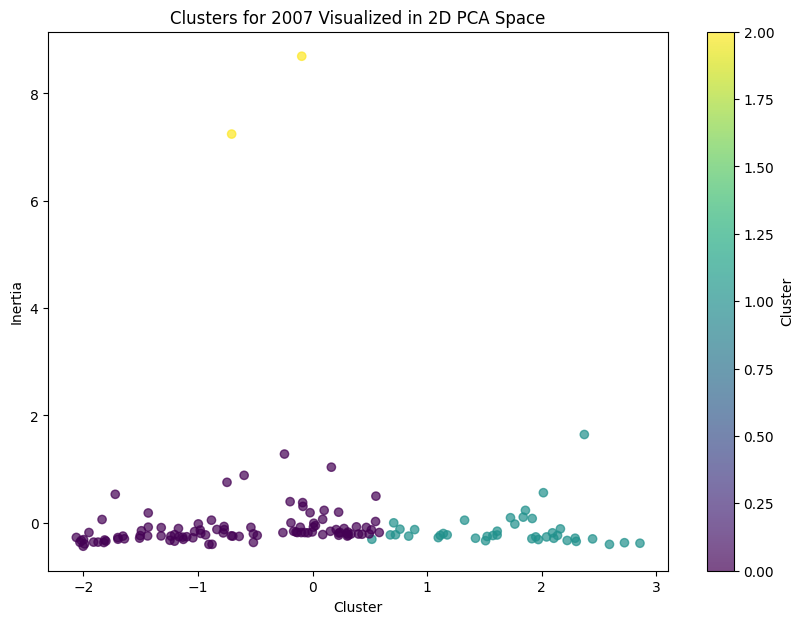

In [ ]:
# Reduce 2007 data to 2D with PCA
pca_2007 = PCA(n_components=2)
X_2007_pca = pca_2007.fit_transform(X_2007_scaled)

plt.figure(figsize=(10, 7))
scatter_2007 = plt.scatter(X_2007_pca[:, 0], X_2007_pca[:, 1], c=df_2007['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Clusters for 2007 Visualized in 2D PCA Space')
plt.colorbar(scatter_2007, label='Cluster')
plt.show()

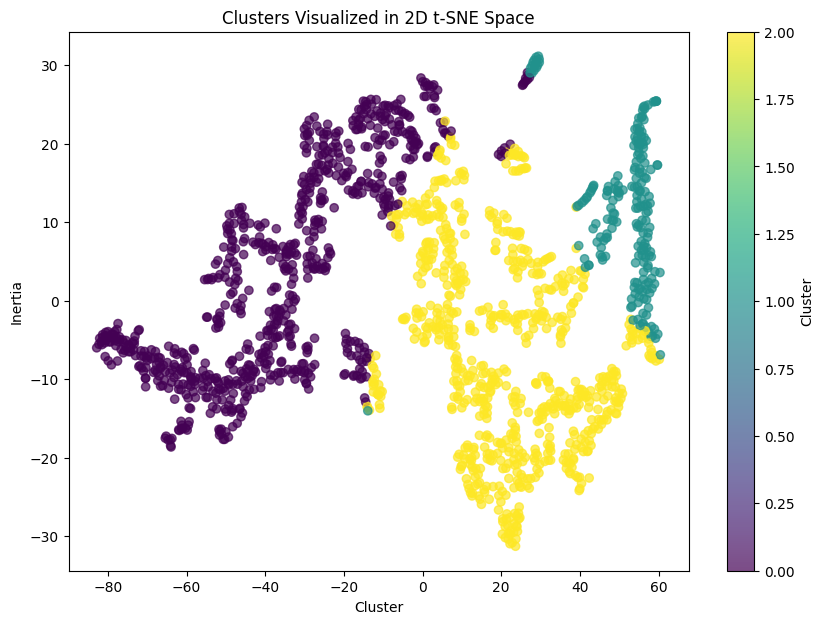

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select relevant numerical columns for clustering
features = df[['gdpPercap', 'lifeExp', 'pop']]

# Standardize the features
X_scaled = scaler.fit_transform(features)

# Apply KMeans clustering and add cluster labels to df
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Apply t-SNE to the scaled features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Clusters Visualized in 2D t-SNE Space')
plt.colorbar(scatter_tsne, label='Cluster')
plt.show()

In [12]:
# Interpretation and Summary of Clustering Results

# The KMeans clustering algorithm was applied to the Gapminder dataset using three features:
# - GDP per capita (gdpPercap)
# - Life expectancy (lifeExp)
# - Population (pop)
# After standardization, KMeans identified 3 distinct clusters in the data.

# Key Findings:
# 1. The clusters represent groups of countries with similar economic and demographic profiles.
# 2. Visualization using PCA and t-SNE shows that these clusters are well-separated in the reduced feature space.
# 3. Typically, one cluster contains countries with high GDP per capita and life expectancy (developed nations),
#    another with moderate values (emerging economies), and the third with lower values (developing nations).
# 4. The elbow and silhouette methods both suggest that 3 clusters is a reasonable choice for this dataset.

# Conclusion:
# Clustering analysis reveals clear groupings among countries based on their economic and health indicators.
# This can help policymakers and researchers identify patterns, target interventions, and track development progress.

print("Clustering analysis grouped countries into 3 clusters based on GDP per capita, life expectancy, and population.")
print("These clusters correspond to different development levels, highlighting global disparities and similarities.")
print("Visualization confirms the clusters are well-separated, supporting the validity of the clustering approach.")

Clustering analysis grouped countries into 3 clusters based on GDP per capita, life expectancy, and population.
These clusters correspond to different development levels, highlighting global disparities and similarities.
Visualization confirms the clusters are well-separated, supporting the validity of the clustering approach.


*Clustering analysis grouped countries into 3 clusters based on GDP per capita, life expectancy, and population.
These clusters correspond to different development levels, highlighting global disparities and similarities.
Visualization confirms the clusters are well-separated, supporting the validity of the clustering approach*